# Breast Cancer

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# breast_cancer dataset laod
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
X[:3,:]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [6]:
Y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
# 훈련데이터셋 테스트데이터셋 (8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [8]:
# 모델 설정
model = Sequential([
    Dense(30, input_dim=30, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,415
Trainable params: 1,415
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [12]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [13]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 134.33990, saving model to ./model/final001-134.3399.hdf5

Epoch 00002: val_loss improved from 134.33990 to 127.64584, saving model to ./model/final002-127.6458.hdf5

Epoch 00003: val_loss improved from 127.64584 to 121.05027, saving model to ./model/final003-121.0503.hdf5

Epoch 00004: val_loss improved from 121.05027 to 114.54957, saving model to ./model/final004-114.5496.hdf5

Epoch 00005: val_loss improved from 114.54957 to 108.13517, saving model to ./model/final005-108.1352.hdf5

Epoch 00006: val_loss improved from 108.13517 to 101.80666, saving model to ./model/final006-101.8067.hdf5

Epoch 00007: val_loss improved from 101.80666 to 95.57147, saving model to ./model/final007-95.5715.hdf5

Epoch 00008: val_loss improved from 95.57147 to 89.53135, saving model to ./model/final008-89.5313.hdf5

Epoch 00009: val_loss improved from 89.53135 to 83.76739, saving model to ./model/final009-83.7674.hdf5

Epoch 00010: val_loss improved from 83.76

Epoch 00099: val_loss improved from 0.80023 to 0.79725, saving model to ./model/final099-0.7972.hdf5

Epoch 00100: val_loss improved from 0.79725 to 0.79477, saving model to ./model/final100-0.7948.hdf5

Epoch 00101: val_loss improved from 0.79477 to 0.79274, saving model to ./model/final101-0.7927.hdf5

Epoch 00102: val_loss improved from 0.79274 to 0.79093, saving model to ./model/final102-0.7909.hdf5

Epoch 00103: val_loss improved from 0.79093 to 0.78908, saving model to ./model/final103-0.7891.hdf5

Epoch 00104: val_loss improved from 0.78908 to 0.78686, saving model to ./model/final104-0.7869.hdf5

Epoch 00105: val_loss improved from 0.78686 to 0.78413, saving model to ./model/final105-0.7841.hdf5

Epoch 00106: val_loss improved from 0.78413 to 0.78082, saving model to ./model/final106-0.7808.hdf5

Epoch 00107: val_loss improved from 0.78082 to 0.77685, saving model to ./model/final107-0.7768.hdf5

Epoch 00108: val_loss improved from 0.77685 to 0.77237, saving model to ./model/fi


Epoch 00184: val_loss improved from 0.36525 to 0.36099, saving model to ./model/final184-0.3610.hdf5

Epoch 00185: val_loss improved from 0.36099 to 0.35701, saving model to ./model/final185-0.3570.hdf5

Epoch 00186: val_loss improved from 0.35701 to 0.35358, saving model to ./model/final186-0.3536.hdf5

Epoch 00187: val_loss improved from 0.35358 to 0.35062, saving model to ./model/final187-0.3506.hdf5

Epoch 00188: val_loss improved from 0.35062 to 0.34815, saving model to ./model/final188-0.3481.hdf5

Epoch 00189: val_loss improved from 0.34815 to 0.34591, saving model to ./model/final189-0.3459.hdf5

Epoch 00190: val_loss improved from 0.34591 to 0.34351, saving model to ./model/final190-0.3435.hdf5

Epoch 00191: val_loss improved from 0.34351 to 0.34081, saving model to ./model/final191-0.3408.hdf5

Epoch 00192: val_loss improved from 0.34081 to 0.33779, saving model to ./model/final192-0.3378.hdf5

Epoch 00193: val_loss improved from 0.33779 to 0.33450, saving model to ./model/f

Epoch 00283: val_loss improved from 0.26372 to 0.26321, saving model to ./model/final283-0.2632.hdf5

Epoch 00284: val_loss improved from 0.26321 to 0.26212, saving model to ./model/final284-0.2621.hdf5

Epoch 00285: val_loss improved from 0.26212 to 0.26120, saving model to ./model/final285-0.2612.hdf5

Epoch 00286: val_loss improved from 0.26120 to 0.26073, saving model to ./model/final286-0.2607.hdf5

Epoch 00287: val_loss improved from 0.26073 to 0.26067, saving model to ./model/final287-0.2607.hdf5

Epoch 00288: val_loss did not improve from 0.26067

Epoch 00289: val_loss improved from 0.26067 to 0.26054, saving model to ./model/final289-0.2605.hdf5

Epoch 00290: val_loss improved from 0.26054 to 0.26020, saving model to ./model/final290-0.2602.hdf5

Epoch 00291: val_loss improved from 0.26020 to 0.25983, saving model to ./model/final291-0.2598.hdf5

Epoch 00292: val_loss improved from 0.25983 to 0.25941, saving model to ./model/final292-0.2594.hdf5

Epoch 00293: val_loss improved


Epoch 00378: val_loss improved from 0.24017 to 0.24010, saving model to ./model/final378-0.2401.hdf5

Epoch 00379: val_loss improved from 0.24010 to 0.24002, saving model to ./model/final379-0.2400.hdf5

Epoch 00380: val_loss improved from 0.24002 to 0.23987, saving model to ./model/final380-0.2399.hdf5

Epoch 00381: val_loss improved from 0.23987 to 0.23965, saving model to ./model/final381-0.2397.hdf5

Epoch 00382: val_loss improved from 0.23965 to 0.23940, saving model to ./model/final382-0.2394.hdf5

Epoch 00383: val_loss improved from 0.23940 to 0.23917, saving model to ./model/final383-0.2392.hdf5

Epoch 00384: val_loss improved from 0.23917 to 0.23897, saving model to ./model/final384-0.2390.hdf5

Epoch 00385: val_loss improved from 0.23897 to 0.23879, saving model to ./model/final385-0.2388.hdf5

Epoch 00386: val_loss improved from 0.23879 to 0.23863, saving model to ./model/final386-0.2386.hdf5

Epoch 00387: val_loss improved from 0.23863 to 0.23843, saving model to ./model/f


Epoch 00489: val_loss improved from 0.22199 to 0.22190, saving model to ./model/final489-0.2219.hdf5

Epoch 00490: val_loss did not improve from 0.22190

Epoch 00491: val_loss did not improve from 0.22190

Epoch 00492: val_loss improved from 0.22190 to 0.22189, saving model to ./model/final492-0.2219.hdf5

Epoch 00493: val_loss improved from 0.22189 to 0.22062, saving model to ./model/final493-0.2206.hdf5

Epoch 00494: val_loss improved from 0.22062 to 0.22003, saving model to ./model/final494-0.2200.hdf5

Epoch 00495: val_loss did not improve from 0.22003

Epoch 00496: val_loss did not improve from 0.22003

Epoch 00497: val_loss did not improve from 0.22003

Epoch 00498: val_loss did not improve from 0.22003

Epoch 00499: val_loss did not improve from 0.22003

Epoch 00500: val_loss did not improve from 0.22003

Epoch 00501: val_loss did not improve from 0.22003

Epoch 00502: val_loss did not improve from 0.22003

Epoch 00503: val_loss improved from 0.22003 to 0.21975, saving model to


Epoch 00618: val_loss improved from 0.19931 to 0.19900, saving model to ./model/final618-0.1990.hdf5

Epoch 00619: val_loss did not improve from 0.19900

Epoch 00620: val_loss improved from 0.19900 to 0.19890, saving model to ./model/final620-0.1989.hdf5

Epoch 00621: val_loss improved from 0.19890 to 0.19702, saving model to ./model/final621-0.1970.hdf5

Epoch 00622: val_loss improved from 0.19702 to 0.19549, saving model to ./model/final622-0.1955.hdf5

Epoch 00623: val_loss did not improve from 0.19549

Epoch 00624: val_loss did not improve from 0.19549

Epoch 00625: val_loss did not improve from 0.19549

Epoch 00626: val_loss did not improve from 0.19549

Epoch 00627: val_loss improved from 0.19549 to 0.19524, saving model to ./model/final627-0.1952.hdf5

Epoch 00628: val_loss did not improve from 0.19524

Epoch 00629: val_loss did not improve from 0.19524

Epoch 00630: val_loss did not improve from 0.19524

Epoch 00631: val_loss did not improve from 0.19524

Epoch 00632: val_loss


Epoch 00758: val_loss improved from 0.18038 to 0.17983, saving model to ./model/final758-0.1798.hdf5

Epoch 00759: val_loss improved from 0.17983 to 0.17891, saving model to ./model/final759-0.1789.hdf5

Epoch 00760: val_loss did not improve from 0.17891

Epoch 00761: val_loss did not improve from 0.17891

Epoch 00762: val_loss did not improve from 0.17891

Epoch 00763: val_loss did not improve from 0.17891

Epoch 00764: val_loss did not improve from 0.17891

Epoch 00765: val_loss did not improve from 0.17891

Epoch 00766: val_loss improved from 0.17891 to 0.17875, saving model to ./model/final766-0.1787.hdf5

Epoch 00767: val_loss did not improve from 0.17875

Epoch 00768: val_loss did not improve from 0.17875

Epoch 00769: val_loss did not improve from 0.17875

Epoch 00770: val_loss did not improve from 0.17875

Epoch 00771: val_loss did not improve from 0.17875

Epoch 00772: val_loss did not improve from 0.17875

Epoch 00773: val_loss did not improve from 0.17875

Epoch 00774: val_


Epoch 00895: val_loss did not improve from 0.16381

Epoch 00896: val_loss did not improve from 0.16381

Epoch 00897: val_loss did not improve from 0.16381

Epoch 00898: val_loss did not improve from 0.16381

Epoch 00899: val_loss improved from 0.16381 to 0.16255, saving model to ./model/final899-0.1626.hdf5

Epoch 00900: val_loss did not improve from 0.16255

Epoch 00901: val_loss did not improve from 0.16255

Epoch 00902: val_loss did not improve from 0.16255

Epoch 00903: val_loss did not improve from 0.16255

Epoch 00904: val_loss did not improve from 0.16255

Epoch 00905: val_loss did not improve from 0.16255

Epoch 00906: val_loss did not improve from 0.16255

Epoch 00907: val_loss did not improve from 0.16255

Epoch 00908: val_loss did not improve from 0.16255

Epoch 00909: val_loss did not improve from 0.16255

Epoch 00910: val_loss improved from 0.16255 to 0.16088, saving model to ./model/final910-0.1609.hdf5

Epoch 00911: val_loss did not improve from 0.16088

Epoch 00912: va


Epoch 01044: val_loss did not improve from 0.14623

Epoch 01045: val_loss did not improve from 0.14623

Epoch 01046: val_loss improved from 0.14623 to 0.14592, saving model to ./model/final1046-0.1459.hdf5

Epoch 01047: val_loss did not improve from 0.14592

Epoch 01048: val_loss improved from 0.14592 to 0.14545, saving model to ./model/final1048-0.1454.hdf5

Epoch 01049: val_loss did not improve from 0.14545

Epoch 01050: val_loss did not improve from 0.14545

Epoch 01051: val_loss did not improve from 0.14545

Epoch 01052: val_loss did not improve from 0.14545

Epoch 01053: val_loss did not improve from 0.14545

Epoch 01054: val_loss did not improve from 0.14545

Epoch 01055: val_loss did not improve from 0.14545

Epoch 01056: val_loss did not improve from 0.14545

Epoch 01057: val_loss did not improve from 0.14545

Epoch 01058: val_loss improved from 0.14545 to 0.14508, saving model to ./model/final1058-0.1451.hdf5

Epoch 01059: val_loss did not improve from 0.14508

Epoch 01060: v

Epoch 01200: val_loss did not improve from 0.12796

Epoch 01201: val_loss did not improve from 0.12796

Epoch 01202: val_loss did not improve from 0.12796

Epoch 01203: val_loss did not improve from 0.12796

Epoch 01204: val_loss did not improve from 0.12796

Epoch 01205: val_loss did not improve from 0.12796

Epoch 01206: val_loss did not improve from 0.12796

Epoch 01207: val_loss did not improve from 0.12796

Epoch 01208: val_loss did not improve from 0.12796

Epoch 01209: val_loss did not improve from 0.12796

Epoch 01210: val_loss did not improve from 0.12796

Epoch 01211: val_loss did not improve from 0.12796

Epoch 01212: val_loss did not improve from 0.12796

Epoch 01213: val_loss did not improve from 0.12796

Epoch 01214: val_loss did not improve from 0.12796

Epoch 01215: val_loss did not improve from 0.12796

Epoch 01216: val_loss did not improve from 0.12796

Epoch 01217: val_loss did not improve from 0.12796

Epoch 01218: val_loss did not improve from 0.12796

Epoch 01219:


Epoch 01357: val_loss did not improve from 0.11506

Epoch 01358: val_loss did not improve from 0.11506

Epoch 01359: val_loss did not improve from 0.11506

Epoch 01360: val_loss did not improve from 0.11506

Epoch 01361: val_loss did not improve from 0.11506

Epoch 01362: val_loss did not improve from 0.11506

Epoch 01363: val_loss did not improve from 0.11506

Epoch 01364: val_loss did not improve from 0.11506

Epoch 01365: val_loss did not improve from 0.11506

Epoch 01366: val_loss did not improve from 0.11506

Epoch 01367: val_loss did not improve from 0.11506

Epoch 01368: val_loss did not improve from 0.11506

Epoch 01369: val_loss did not improve from 0.11506

Epoch 01370: val_loss did not improve from 0.11506

Epoch 01371: val_loss did not improve from 0.11506

Epoch 01372: val_loss did not improve from 0.11506

Epoch 01373: val_loss did not improve from 0.11506

Epoch 01374: val_loss did not improve from 0.11506

Epoch 01375: val_loss did not improve from 0.11506

Epoch 01376

Epoch 01532: val_loss did not improve from 0.11169

Epoch 01533: val_loss did not improve from 0.11169

Epoch 01534: val_loss did not improve from 0.11169

Epoch 01535: val_loss did not improve from 0.11169

Epoch 01536: val_loss did not improve from 0.11169

Epoch 01537: val_loss did not improve from 0.11169

Epoch 01538: val_loss did not improve from 0.11169

Epoch 01539: val_loss did not improve from 0.11169

Epoch 01540: val_loss did not improve from 0.11169

Epoch 01541: val_loss did not improve from 0.11169

Epoch 01542: val_loss did not improve from 0.11169

Epoch 01543: val_loss did not improve from 0.11169

Epoch 01544: val_loss did not improve from 0.11169

Epoch 01545: val_loss did not improve from 0.11169

Epoch 01546: val_loss did not improve from 0.11169

Epoch 01547: val_loss did not improve from 0.11169

Epoch 01548: val_loss did not improve from 0.11169

Epoch 01549: val_loss did not improve from 0.11169

Epoch 01550: val_loss did not improve from 0.11169

Epoch 01551:

In [14]:
del model
model = load_model('model/final1562-0.0961.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

114/114 - 0s - loss: 0.0612 - accuracy: 0.9825

 Accuracy: 0.9825


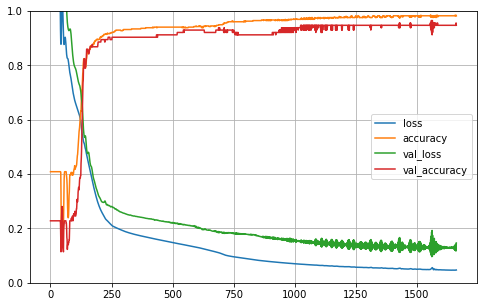

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Digit

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
X = digits.data
Y_obj = digits.target

In [7]:
X.shape

(1797, 64)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(0.3071437902148591, 0.3766279093674481)

In [9]:
Y_obj[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# One-Hot Encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
Y = np_utils.to_categorical(Y_obj)

Using TensorFlow backend.


In [11]:
Y.shape

(1797, 10)

In [12]:
# 훈련데이터셋 테스트데이터셋 (8:2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=seed)

In [13]:
# 모델 설정
model = Sequential([
    Dense(600, input_dim=64, activation='relu'),
    Dense(600, activation='relu'),
    Dense(600, activation='relu'),
    Dense(10, activation='sigmoid')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               39000     
_________________________________________________________________
dense_1 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_2 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6010      
Total params: 766,210
Trainable params: 766,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [15]:
# 모델 저장 폴더 설정
import os
MODEL_DIR = './model/digits/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [16]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [17]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [49]:
# 모델 실행 및 저장
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5000, batch_size=400,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 2.04914, saving model to ./model/digits/final001-2.0491.hdf5

Epoch 00002: val_loss improved from 2.04914 to 1.58582, saving model to ./model/digits/final002-1.5858.hdf5

Epoch 00003: val_loss improved from 1.58582 to 0.83395, saving model to ./model/digits/final003-0.8339.hdf5

Epoch 00004: val_loss improved from 0.83395 to 0.46896, saving model to ./model/digits/final004-0.4690.hdf5

Epoch 00005: val_loss improved from 0.46896 to 0.39118, saving model to ./model/digits/final005-0.3912.hdf5

Epoch 00006: val_loss improved from 0.39118 to 0.21853, saving model to ./model/digits/final006-0.2185.hdf5

Epoch 00007: val_loss did not improve from 0.21853

Epoch 00008: val_loss improved from 0.21853 to 0.18017, saving model to ./model/digits/final008-0.1802.hdf5

Epoch 00009: val_loss improved from 0.18017 to 0.14463, saving model to ./model/digits/final009-0.1446.hdf5

Epoch 00010: val_loss improved from 0.14463 to 0.14154, saving model to ./model

In [50]:
del model
model = load_model('model/digits/final034-0.0728.hdf5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

360/360 - 0s - loss: 0.0689 - accuracy: 0.9833

 Accuracy: 0.9833


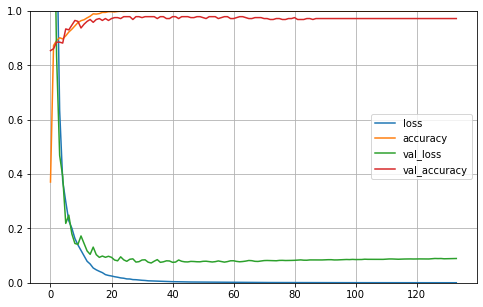

In [51]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# 하이퍼 파라미터 튜닝

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

def build_model(n_hidden=3, n_neurons=100, learning_rate=3e-3,input_shape=[64]):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    optimizer = Adam(lr=learning_rate)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [26]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [3,4,5,6,7,8],
    "n_neurons": np.arange(100,800),
    "learning_rate": reciprocal(3e-4,3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10,cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=2000,
                 validation_split=0.2,
                 callbacks=[EarlyStopping(patience=10)])

Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 562us/sample - loss: 1.2982 - accuracy: 0.5457 - val_loss: 0.6133 - val_accuracy: 0.7552
Epoch 2/2000
766/766 [==============================] - 0s 111us/sample - loss: 0.4688 - accuracy: 0.8616 - val_loss: 0.4174 - val_accuracy: 0.8698
Epoch 3/2000
766/766 [==============================] - 0s 99us/sample - loss: 0.2112 - accuracy: 0.9360 - val_loss: 0.2366 - val_accuracy: 0.9062
Epoch 4/2000
766/766 [==============================] - 0s 100us/sample - loss: 0.2110 - accuracy: 0.9321 - val_loss: 0.3287 - val_accuracy: 0.8958
Epoch 5/2000
766/766 [==============================] - 0s 98us/sample - loss: 0.2244 - accuracy: 0.9334 - val_loss: 0.2463 - val_accuracy: 0.9115
Epoch 6/2000
766/766 [==============================] - 0s 99us/sample - loss: 0.1269 - accuracy: 0.9634 - val_loss: 0.1886 - val_accuracy: 0.9219
Epoch 7/2000
766/766 [==============================] - 0s 102us/samp

766/766 [==============================] - 0s 97us/sample - loss: 0.1013 - accuracy: 0.9726 - val_loss: 0.2521 - val_accuracy: 0.9375
Epoch 7/2000
766/766 [==============================] - 0s 98us/sample - loss: 0.0841 - accuracy: 0.9765 - val_loss: 0.2922 - val_accuracy: 0.9271
Epoch 8/2000
766/766 [==============================] - 0s 104us/sample - loss: 0.1093 - accuracy: 0.9687 - val_loss: 0.2991 - val_accuracy: 0.9271
Epoch 9/2000
766/766 [==============================] - 0s 102us/sample - loss: 0.1556 - accuracy: 0.9661 - val_loss: 0.2778 - val_accuracy: 0.9479
Epoch 10/2000
766/766 [==============================] - 0s 95us/sample - loss: 0.1381 - accuracy: 0.9634 - val_loss: 0.6107 - val_accuracy: 0.9062
Epoch 11/2000
766/766 [==============================] - 0s 87us/sample - loss: 0.1969 - accuracy: 0.9582 - val_loss: 0.1678 - val_accuracy: 0.9479
Epoch 12/2000
766/766 [==============================] - 0s 90us/sample - loss: 0.1181 - accuracy: 0.9778 - val_loss: 0.3271 - 

Epoch 37/2000
766/766 [==============================] - 0s 378us/sample - loss: 1.6064e-04 - accuracy: 1.0000 - val_loss: 0.0534 - val_accuracy: 0.9844
Epoch 38/2000
766/766 [==============================] - 0s 356us/sample - loss: 1.5253e-04 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9844
Epoch 39/2000
766/766 [==============================] - 0s 347us/sample - loss: 1.4418e-04 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9844
Epoch 40/2000
766/766 [==============================] - 0s 390us/sample - loss: 1.3993e-04 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 41/2000
766/766 [==============================] - 0s 362us/sample - loss: 1.3199e-04 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9844
Epoch 42/2000
766/766 [==============================] - 0s 402us/sample - loss: 1.2626e-04 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9844
Epoch 43/2000
766/766 [==============================] - 0s 362us/sample - loss: 1

766/766 [==============================] - 1s 910us/sample - loss: 1.7651 - accuracy: 0.6018 - val_loss: 0.7482 - val_accuracy: 0.7969
Epoch 2/2000
766/766 [==============================] - 0s 393us/sample - loss: 0.4635 - accuracy: 0.8420 - val_loss: 0.3701 - val_accuracy: 0.8958
Epoch 3/2000
766/766 [==============================] - 0s 394us/sample - loss: 0.2512 - accuracy: 0.9230 - val_loss: 0.2992 - val_accuracy: 0.9010
Epoch 4/2000
766/766 [==============================] - 0s 497us/sample - loss: 0.1594 - accuracy: 0.9491 - val_loss: 0.2692 - val_accuracy: 0.9219
Epoch 5/2000
766/766 [==============================] - 0s 511us/sample - loss: 0.1212 - accuracy: 0.9595 - val_loss: 0.1723 - val_accuracy: 0.9375
Epoch 6/2000
766/766 [==============================] - 0s 368us/sample - loss: 0.0660 - accuracy: 0.9804 - val_loss: 0.1404 - val_accuracy: 0.9583
Epoch 7/2000
766/766 [==============================] - 0s 369us/sample - loss: 0.0548 - accuracy: 0.9804 - val_loss: 0.2114 

766/766 [==============================] - 0s 61us/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9792
Epoch 33/2000
479/479 [==============================] - 0s 188us/sample - loss: 0.1679 - accuracy: 0.9582
Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 539us/sample - loss: 2.1993 - accuracy: 0.2180 - val_loss: 1.9949 - val_accuracy: 0.5938
Epoch 2/2000
766/766 [==============================] - 0s 56us/sample - loss: 1.4067 - accuracy: 0.7441 - val_loss: 0.9455 - val_accuracy: 0.6875
Epoch 3/2000
766/766 [==============================] - 0s 47us/sample - loss: 0.6323 - accuracy: 0.8068 - val_loss: 0.5332 - val_accuracy: 0.8594
Epoch 4/2000
766/766 [==============================] - 0s 41us/sample - loss: 0.3282 - accuracy: 0.9125 - val_loss: 0.3312 - val_accuracy: 0.9219
Epoch 5/2000
766/766 [==============================] - 0s 41us/sample - loss: 0.2250 - accuracy: 0.9504 - val_loss: 0.2770 

Epoch 23/2000
766/766 [==============================] - 0s 54us/sample - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1940 - val_accuracy: 0.9635
Epoch 24/2000
479/479 [==============================] - 0s 163us/sample - loss: 0.1380 - accuracy: 0.9582
Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 508us/sample - loss: 1.4764 - accuracy: 0.5888 - val_loss: 0.4616 - val_accuracy: 0.8438
Epoch 2/2000
766/766 [==============================] - 0s 69us/sample - loss: 0.3426 - accuracy: 0.8903 - val_loss: 0.1937 - val_accuracy: 0.9583
Epoch 3/2000
766/766 [==============================] - 0s 57us/sample - loss: 0.1324 - accuracy: 0.9582 - val_loss: 0.1374 - val_accuracy: 0.9583
Epoch 4/2000
766/766 [==============================] - 0s 59us/sample - loss: 0.1073 - accuracy: 0.9661 - val_loss: 0.1100 - val_accuracy: 0.9635
Epoch 5/2000
766/766 [==============================] - 0s 63us/sample - loss: 0.0744 - accuracy: 0.9765 - val

766/766 [==============================] - 0s 70us/sample - loss: 2.3951e-04 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9688
Epoch 32/2000
766/766 [==============================] - 0s 69us/sample - loss: 2.3841e-04 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9688
Epoch 33/2000
766/766 [==============================] - 0s 69us/sample - loss: 2.1349e-04 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9688
Epoch 34/2000
766/766 [==============================] - 0s 73us/sample - loss: 2.0191e-04 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9688
Epoch 35/2000
766/766 [==============================] - 0s 44us/sample - loss: 1.8612e-04 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9688
Epoch 36/2000
766/766 [==============================] - 0s 89us/sample - loss: 1.7853e-04 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9688
Epoch 37/2000
479/479 [==============================] - 0s 131us/sample - loss: 0.1223 - accuracy: 0.

Epoch 2/2000
766/766 [==============================] - 0s 246us/sample - loss: 0.2527 - accuracy: 0.9204 - val_loss: 0.4545 - val_accuracy: 0.8750
Epoch 3/2000
766/766 [==============================] - 0s 252us/sample - loss: 0.1540 - accuracy: 0.9504 - val_loss: 0.3344 - val_accuracy: 0.9010
Epoch 4/2000
766/766 [==============================] - 0s 230us/sample - loss: 0.1642 - accuracy: 0.9465 - val_loss: 0.2494 - val_accuracy: 0.9323
Epoch 5/2000
766/766 [==============================] - 0s 232us/sample - loss: 0.1391 - accuracy: 0.9582 - val_loss: 0.2904 - val_accuracy: 0.9219
Epoch 6/2000
766/766 [==============================] - 0s 225us/sample - loss: 0.1065 - accuracy: 0.9634 - val_loss: 0.2542 - val_accuracy: 0.9219
Epoch 7/2000
766/766 [==============================] - 0s 223us/sample - loss: 0.1847 - accuracy: 0.9439 - val_loss: 0.2848 - val_accuracy: 0.9427
Epoch 8/2000
766/766 [==============================] - 0s 248us/sample - loss: 0.1025 - accuracy: 0.9621 - val_

766/766 [==============================] - 1s 830us/sample - loss: 1.9699 - accuracy: 0.2755 - val_loss: 1.4457 - val_accuracy: 0.3750
Epoch 2/2000
766/766 [==============================] - 0s 146us/sample - loss: 1.0964 - accuracy: 0.5627 - val_loss: 0.9225 - val_accuracy: 0.6875
Epoch 3/2000
766/766 [==============================] - 0s 136us/sample - loss: 0.7008 - accuracy: 0.7428 - val_loss: 0.8012 - val_accuracy: 0.7083
Epoch 4/2000
766/766 [==============================] - 0s 102us/sample - loss: 0.5888 - accuracy: 0.7781 - val_loss: 0.5891 - val_accuracy: 0.7656
Epoch 5/2000
766/766 [==============================] - 0s 148us/sample - loss: 0.3744 - accuracy: 0.8460 - val_loss: 0.3595 - val_accuracy: 0.8333
Epoch 6/2000
766/766 [==============================] - 0s 115us/sample - loss: 0.4039 - accuracy: 0.8264 - val_loss: 0.4480 - val_accuracy: 0.8438
Epoch 7/2000
766/766 [==============================] - 0s 88us/sample - loss: 0.3815 - accuracy: 0.8486 - val_loss: 0.4782 -

766/766 [==============================] - 0s 126us/sample - loss: 1.3741 - accuracy: 0.6358 - val_loss: 2.4627 - val_accuracy: 0.5469
Epoch 17/2000
766/766 [==============================] - 0s 132us/sample - loss: 0.9814 - accuracy: 0.6606 - val_loss: 1.0371 - val_accuracy: 0.6875
Epoch 18/2000
766/766 [==============================] - 0s 122us/sample - loss: 0.6433 - accuracy: 0.6501 - val_loss: 0.7878 - val_accuracy: 0.6927
Epoch 19/2000
479/479 [==============================] - 0s 212us/sample - loss: 0.5859 - accuracy: 0.7370
Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 494us/sample - loss: 1.4061 - accuracy: 0.6044 - val_loss: 0.4639 - val_accuracy: 0.8281
Epoch 2/2000
766/766 [==============================] - 0s 82us/sample - loss: 0.3466 - accuracy: 0.8916 - val_loss: 0.2424 - val_accuracy: 0.9219
Epoch 3/2000
766/766 [==============================] - 0s 82us/sample - loss: 0.1411 - accuracy: 0.9556 - val_loss: 0.

766/766 [==============================] - 0s 68us/sample - loss: 0.3318 - accuracy: 0.8956 - val_loss: 0.3345 - val_accuracy: 0.8750
Epoch 3/2000
766/766 [==============================] - 0s 82us/sample - loss: 0.1772 - accuracy: 0.9504 - val_loss: 0.2514 - val_accuracy: 0.9271
Epoch 4/2000
766/766 [==============================] - 0s 92us/sample - loss: 0.1490 - accuracy: 0.9426 - val_loss: 0.3102 - val_accuracy: 0.9010
Epoch 5/2000
766/766 [==============================] - 0s 61us/sample - loss: 0.0926 - accuracy: 0.9752 - val_loss: 0.1815 - val_accuracy: 0.9583
Epoch 6/2000
766/766 [==============================] - 0s 86us/sample - loss: 0.0546 - accuracy: 0.9817 - val_loss: 0.1747 - val_accuracy: 0.9479
Epoch 7/2000
766/766 [==============================] - 0s 72us/sample - loss: 0.0296 - accuracy: 0.9935 - val_loss: 0.1921 - val_accuracy: 0.9427
Epoch 8/2000
766/766 [==============================] - 0s 90us/sample - loss: 0.0458 - accuracy: 0.9869 - val_loss: 0.1828 - val_a

766/766 [==============================] - 0s 326us/sample - loss: 10.2908 - accuracy: 0.1070 - val_loss: 10.0566 - val_accuracy: 0.0729
Epoch 11/2000
479/479 [==============================] - 0s 241us/sample - loss: 10.3053 - accuracy: 0.0960
Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 609us/sample - loss: 1.4397 - accuracy: 0.5561 - val_loss: 0.9733 - val_accuracy: 0.6927
Epoch 2/2000
766/766 [==============================] - 0s 107us/sample - loss: 0.4667 - accuracy: 0.8446 - val_loss: 0.4415 - val_accuracy: 0.8542
Epoch 3/2000
766/766 [==============================] - 0s 91us/sample - loss: 0.1951 - accuracy: 0.9282 - val_loss: 0.2133 - val_accuracy: 0.9375
Epoch 4/2000
766/766 [==============================] - 0s 102us/sample - loss: 0.1487 - accuracy: 0.9413 - val_loss: 0.1741 - val_accuracy: 0.9375
Epoch 5/2000
766/766 [==============================] - 0s 91us/sample - loss: 0.1119 - accuracy: 0.9700 - val_loss: 0

Epoch 22/2000
766/766 [==============================] - 0s 95us/sample - loss: 4.8887e-05 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 0.9635
Epoch 23/2000
479/479 [==============================] - 0s 184us/sample - loss: 0.1420 - accuracy: 0.9749
Train on 766 samples, validate on 192 samples
Epoch 1/2000
766/766 [==============================] - 0s 600us/sample - loss: 1.4126 - accuracy: 0.5679 - val_loss: 0.6577 - val_accuracy: 0.8073
Epoch 2/2000
766/766 [==============================] - 0s 97us/sample - loss: 0.4497 - accuracy: 0.8603 - val_loss: 0.3384 - val_accuracy: 0.8646
Epoch 3/2000
766/766 [==============================] - 0s 103us/sample - loss: 0.2505 - accuracy: 0.9269 - val_loss: 0.3154 - val_accuracy: 0.8906
Epoch 4/2000
766/766 [==============================] - 0s 112us/sample - loss: 0.1596 - accuracy: 0.9452 - val_loss: 0.2816 - val_accuracy: 0.9115
Epoch 5/2000
766/766 [==============================] - 0s 115us/sample - loss: 0.0818 - accuracy: 0.973

766/766 [==============================] - 0s 74us/sample - loss: 0.1099 - accuracy: 0.9661 - val_loss: 0.1644 - val_accuracy: 0.9479
Epoch 5/2000
766/766 [==============================] - 0s 68us/sample - loss: 0.0989 - accuracy: 0.9648 - val_loss: 0.1587 - val_accuracy: 0.9427
Epoch 6/2000
766/766 [==============================] - 0s 65us/sample - loss: 0.0513 - accuracy: 0.9817 - val_loss: 0.0628 - val_accuracy: 0.9844
Epoch 7/2000
766/766 [==============================] - 0s 63us/sample - loss: 0.0217 - accuracy: 0.9948 - val_loss: 0.2395 - val_accuracy: 0.9219
Epoch 8/2000
766/766 [==============================] - 0s 76us/sample - loss: 0.0314 - accuracy: 0.9935 - val_loss: 0.1236 - val_accuracy: 0.9635
Epoch 9/2000
766/766 [==============================] - 0s 73us/sample - loss: 0.0588 - accuracy: 0.9778 - val_loss: 0.2129 - val_accuracy: 0.9115
Epoch 10/2000
766/766 [==============================] - 0s 81us/sample - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.0912 - val_

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000279BD945548>, as the constructor either does not set or modifies parameter learning_rate

In [27]:
rnd_search_cv.best_params_

{'learning_rate': 0.0014182873712938946, 'n_hidden': 5, 'n_neurons': 346}

In [28]:
rnd_search_cv.best_score_

0.9721642136573792

In [23]:
model = rnd_search_cv.best_estimator_.model
model.save('./model/digits/digits_best_model.h5')
print("\n Accuracy: %.4f" % (model.evaluate(X_test, y_test, verbose=2)[1]))

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'